<a href="https://colab.research.google.com/github/rndy44/ML-tugas1/blob/main/ProyekOptimasiMebel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Mengimport library dasar
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Menghubungkan Google Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Mendefinisikan path folder proyek Anda di Google Drive
# PASTIKAN ANDA MENGGANTI 'ProyekOptimasiMebel' DENGAN NAMA FOLDER YANG SEBENARNYA DI G.DRIVE ANDA
project_folder_path = '/content/drive/MyDrive/ProyekOptimasiMebel/'
os.makedirs(project_folder_path, exist_ok=True) # Membuat folder jika belum ada
print(f"Folder proyek diatur ke: {project_folder_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder proyek diatur ke: /content/drive/MyDrive/ProyekOptimasiMebel/


In [5]:
# Path lengkap ke file data di Google Drive Anda
mebel_data_file = os.path.join(project_folder_path, 'data_mebel.csv')
kontainer_data_file = os.path.join(project_folder_path, 'data_kontainer.csv')

# Contoh: Membuat data dummy jika file belum ada (untuk pengujian awal)
if not os.path.exists(mebel_data_file) or not os.path.exists(kontainer_data_file):
    print("File data tidak ditemukan, membuat data dummy untuk demonstrasi...")
    # Data dummy untuk mebel
    dummy_mebel = {
        'ID_Barang': [f'MBL_{i:03d}' for i in range(1, 21)],
        'Panjang': np.random.randint(50, 200, 20),
        'Lebar': np.random.randint(30, 150, 20),
        'Tinggi': np.random.randint(20, 100, 20),
        'Berat': np.random.randint(5, 50, 20),
        'Jenis_Material': np.random.choice(['Kayu', 'Besi', 'Kaca', 'Plastik'], 20),
        'Instruksi_Khusus': np.random.choice(['Fragile', 'Handle with care', 'Stackable', 'Non-stackable', 'None'], 20)
    }
    df_mebel = pd.DataFrame(dummy_mebel)
    df_mebel.to_csv(mebel_data_file, index=False)
    print("Data Mebel dummy berhasil dibuat.")

    # Data dummy untuk kontainer
    dummy_kontainer = {
        'Jenis_Kontainer': ['20ft_Dry', '40ft_Dry', '40ft_High_Cube'],
        'Panjang_Internal': [589.8, 1203.2, 1203.2], # cm
        'Lebar_Internal': [235.2, 235.2, 235.2], # cm
        'Tinggi_Internal': [239.0, 239.0, 269.8], # cm
        'Kapasitas_Max_Berat_kg': [28000, 26000, 26000] # kg
    }
    df_kontainer = pd.DataFrame(dummy_kontainer)
    df_kontainer.to_csv(kontainer_data_file, index=False)
    print("Data Kontainer dummy berhasil dibuat.")
    print("Silakan jalankan kembali sel ini untuk memuat data dummy.")

# Memuat data ke DataFrame
try:
    df_mebel = pd.read_csv(mebel_data_file)
    df_kontainer = pd.read_csv(kontainer_data_file)
    print("\nData berhasil dimuat dari file CSV.")
    print("\n--- Contoh Data Mebel ---")
    print(df_mebel.head())
    print("\n--- Contoh Data Kontainer ---")
    print(df_kontainer.head())
except Exception as e:
    print(f"Gagal memuat data: {e}")
    print("Pastikan file CSV berada di lokasi yang benar di Google Drive Anda.")

File data tidak ditemukan, membuat data dummy untuk demonstrasi...
Data Mebel dummy berhasil dibuat.
Data Kontainer dummy berhasil dibuat.
Silakan jalankan kembali sel ini untuk memuat data dummy.

Data berhasil dimuat dari file CSV.

--- Contoh Data Mebel ---
  ID_Barang  Panjang  Lebar  Tinggi  Berat Jenis_Material  Instruksi_Khusus
0   MBL_001       82     89      37      9        Plastik           Fragile
1   MBL_002       53     87      26     16           Besi  Handle with care
2   MBL_003      155    122      82     31           Besi     Non-stackable
3   MBL_004      151     92      40     36           Kaca           Fragile
4   MBL_005      120    129      92     14           Besi           Fragile

--- Contoh Data Kontainer ---
  Jenis_Kontainer  Panjang_Internal  Lebar_Internal  Tinggi_Internal  \
0        20ft_Dry             589.8           235.2            239.0   
1        40ft_Dry            1203.2           235.2            239.0   
2  40ft_High_Cube            1203.2 

In [6]:
# A. Pembersihan Data
# Isi missing values di kolom numerik dengan median (contoh)
for col in ['Panjang', 'Lebar', 'Tinggi', 'Berat']:
    if col in df_mebel.columns:
        df_mebel[col].fillna(df_mebel[col].median(), inplace=True)
        print(f"Missing values di '{col}' (mebel) ditangani.")
for col in ['Panjang_Internal', 'Lebar_Internal', 'Tinggi_Internal', 'Kapasitas_Max_Berat_kg']:
    if col in df_kontainer.columns:
        df_kontainer[col].fillna(df_kontainer[col].median(), inplace=True)
        print(f"Missing values di '{col}' (kontainer) ditangani.")

# B. Transformasi Data
# Hitung volume untuk barang mebel (cm^3)
df_mebel['Volume_cm3'] = df_mebel['Panjang'] * df_mebel['Lebar'] * df_mebel['Tinggi']
# Hitung volume internal untuk kontainer (cm^3)
df_kontainer['Volume_Internal_cm3'] = df_kontainer['Panjang_Internal'] * df_kontainer['Lebar_Internal'] * df_kontainer['Tinggi_Internal']

print("\nDataFrame setelah preprocessing (penambahan kolom volume):")
print(df_mebel.head())
print(df_kontainer.head())

# Contoh Ekstraksi Fitur (Opsional): Hitung kepadatan barang
df_mebel['Kepadatan_kg_per_cm3'] = df_mebel['Berat'] / df_mebel['Volume_cm3']
print("\nKolom 'Kepadatan_kg_per_cm3' ditambahkan ke data mebel.")

Missing values di 'Panjang' (mebel) ditangani.
Missing values di 'Lebar' (mebel) ditangani.
Missing values di 'Tinggi' (mebel) ditangani.
Missing values di 'Berat' (mebel) ditangani.
Missing values di 'Panjang_Internal' (kontainer) ditangani.
Missing values di 'Lebar_Internal' (kontainer) ditangani.
Missing values di 'Tinggi_Internal' (kontainer) ditangani.
Missing values di 'Kapasitas_Max_Berat_kg' (kontainer) ditangani.

DataFrame setelah preprocessing (penambahan kolom volume):
  ID_Barang  Panjang  Lebar  Tinggi  Berat Jenis_Material  Instruksi_Khusus  \
0   MBL_001       82     89      37      9        Plastik           Fragile   
1   MBL_002       53     87      26     16           Besi  Handle with care   
2   MBL_003      155    122      82     31           Besi     Non-stackable   
3   MBL_004      151     92      40     36           Kaca           Fragile   
4   MBL_005      120    129      92     14           Besi           Fragile   

   Volume_cm3  
0      270026  
1      

/tmp/ipython-input-6-730203782.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mebel[col].fillna(df_mebel[col].median(), inplace=True)
/tmp/ipython-input-6-730203782.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr


--- Visualisasi Distribusi Dimensi, Berat, dan Volume Mebel ---


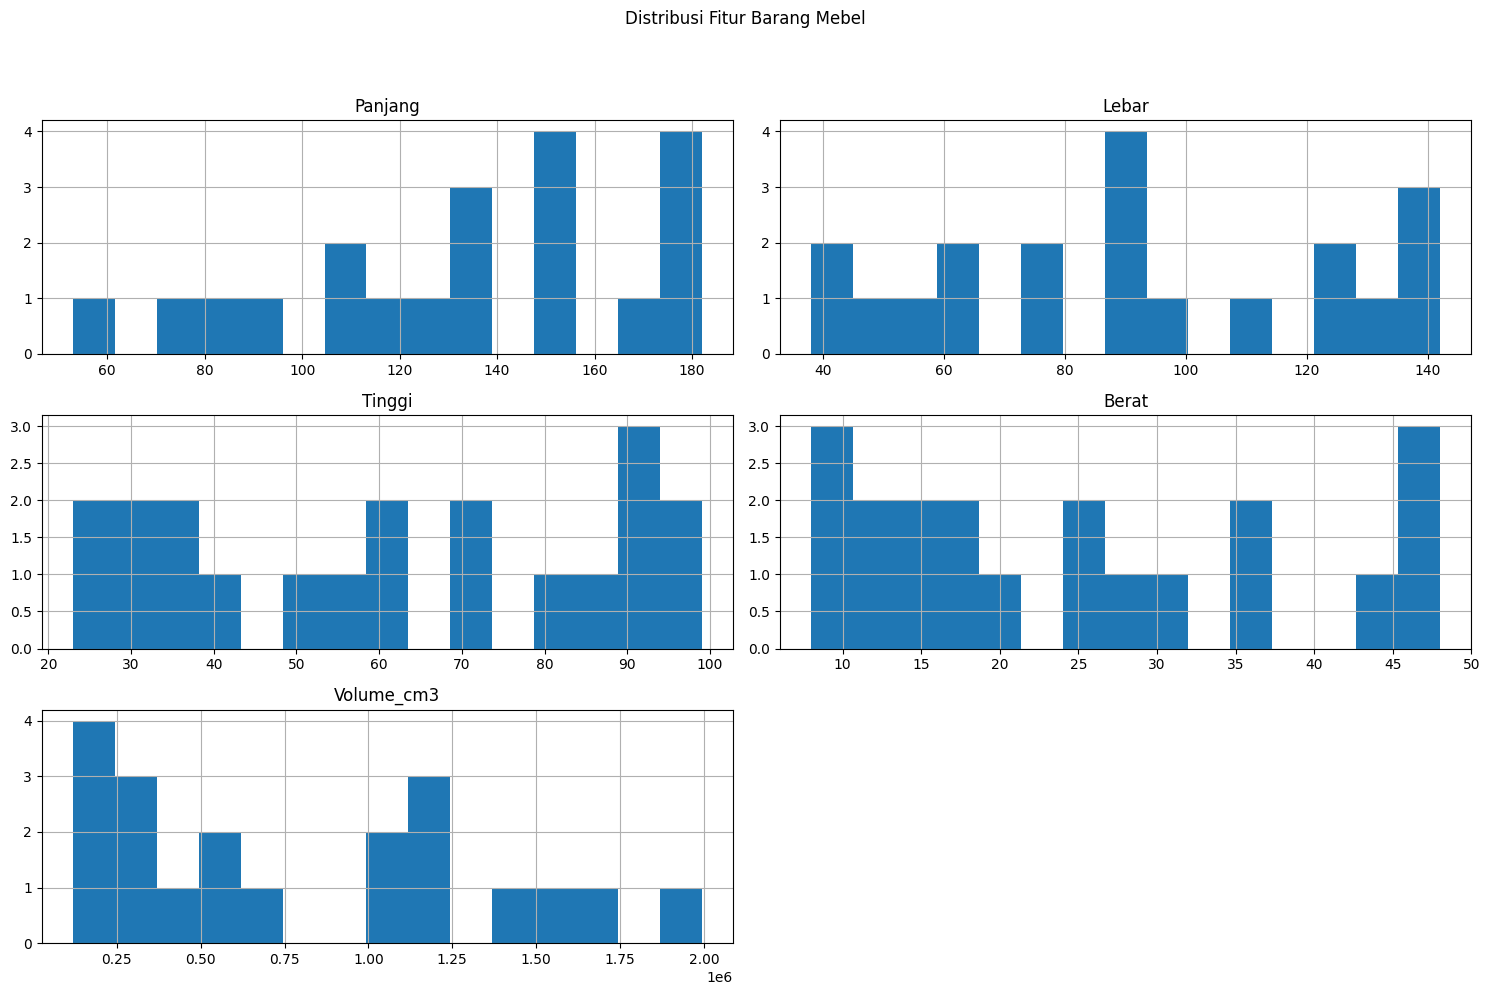

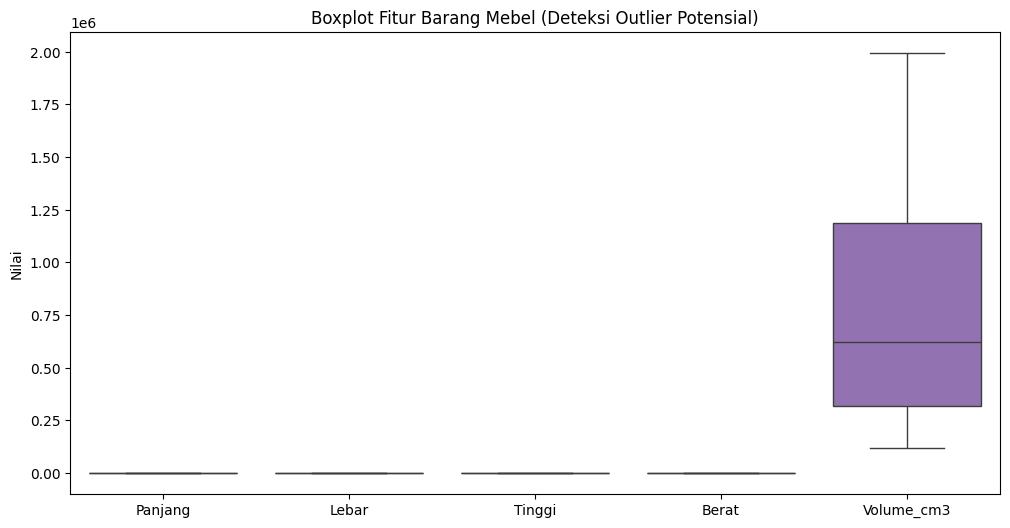

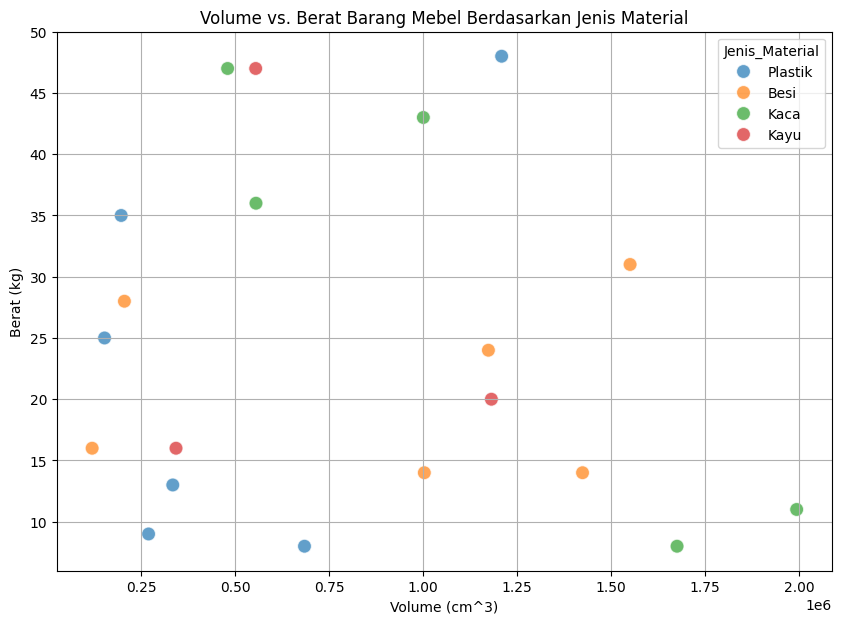


--- Deskripsi Statistik Kapasitas Kontainer ---
       Panjang_Internal  Lebar_Internal  Tinggi_Internal  \
count          3.000000    3.000000e+00         3.000000   
mean         998.733333    2.352000e+02       249.266667   
std          354.146655    3.480934e-14        17.782388   
min          589.800000    2.352000e+02       239.000000   
25%          896.500000    2.352000e+02       239.000000   
50%         1203.200000    2.352000e+02       239.000000   
75%         1203.200000    2.352000e+02       254.400000   
max         1203.200000    2.352000e+02       269.800000   

       Kapasitas_Max_Berat_kg  Volume_Internal_cm3  
count                3.000000         3.000000e+00  
mean             26666.666667         5.904699e+07  
std               1154.700538         2.284329e+07  
min              26000.000000         3.315431e+07  
25%              26000.000000         5.039478e+07  
50%              26000.000000         6.763524e+07  
75%              27000.000000         7

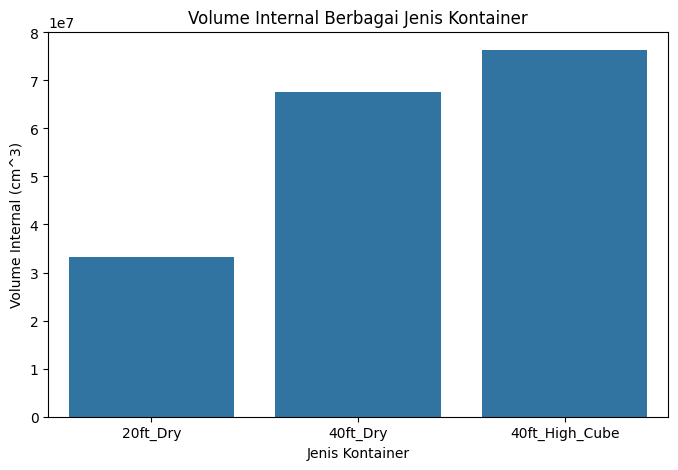

In [7]:
# A. Distribusi Dimensi dan Berat Barang Mebel
print("\n--- Visualisasi Distribusi Dimensi, Berat, dan Volume Mebel ---")
df_mebel[['Panjang', 'Lebar', 'Tinggi', 'Berat', 'Volume_cm3']].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribusi Fitur Barang Mebel', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

# B. Boxplot untuk Outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_mebel[['Panjang', 'Lebar', 'Tinggi', 'Berat', 'Volume_cm3']])
plt.title('Boxplot Fitur Barang Mebel (Deteksi Outlier Potensial)')
plt.ylabel('Nilai')
plt.show()

# C. Hubungan Volume dan Berat berdasarkan Jenis Material
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Volume_cm3', y='Berat', hue='Jenis_Material', data=df_mebel, s=100, alpha=0.7)
plt.title('Volume vs. Berat Barang Mebel Berdasarkan Jenis Material')
plt.xlabel('Volume (cm^3)')
plt.ylabel('Berat (kg)')
plt.grid(True)
plt.show()

# D. Kapasitas Kontainer
print("\n--- Deskripsi Statistik Kapasitas Kontainer ---")
print(df_kontainer.describe())

plt.figure(figsize=(8, 5))
sns.barplot(x='Jenis_Kontainer', y='Volume_Internal_cm3', data=df_kontainer)
plt.title('Volume Internal Berbagai Jenis Kontainer')
plt.xlabel('Jenis Kontainer')
plt.ylabel('Volume Internal (cm^3)')
plt.show()

In [8]:
import time

def perform_3d_bin_packing(items_df, container_spec):
    """
    Melakukan simulasi 3D Bin Packing menggunakan heuristik FFDV yang disempurnakan.
    Ini adalah versi yang sedikit lebih maju dari FFDV, yang mempertimbangkan posisi.
    Namun, masih *belum* sempurna untuk rotasi atau optimasi celah yang kompleks.

    Parameters:
    - items_df (pd.DataFrame): DataFrame berisi detail barang mebel.
                               Harus memiliki kolom 'ID_Barang', 'Panjang', 'Lebar', 'Tinggi', 'Berat'.
    - container_spec (pd.Series): Series berisi detail kontainer.
                                 Harus memiliki 'Panjang_Internal', 'Lebar_Internal', 'Tinggi_Internal', 'Kapasitas_Max_Berat_kg'.

    Returns:
    - loaded_items (list): Daftar dictionary berisi detail barang yang berhasil dimuat,
                           termasuk posisi (x, y, z) jika berhasil ditempatkan.
    - efficiency_volume (float): Persentase pemanfaatan volume kontainer.
    - total_loaded_weight (float): Total berat barang yang dimuat.
    """
    # Urutkan barang berdasarkan volume dari terbesar ke terkecil
    items_sorted = items_df.sort_values(by='Volume_cm3', ascending=False).to_dict('records')

    container_P = container_spec['Panjang_Internal']
    container_L = container_spec['Lebar_Internal']
    container_T = container_spec['Tinggi_Internal']
    max_weight = container_spec['Kapasitas_Max_Berat_kg']
    container_volume = container_P * container_L * container_T

    loaded_items = []
    total_loaded_volume = 0
    total_loaded_weight = 0

    # Merepresentasikan ruang kosong dalam kontainer (ini adalah penyederhanaan)
    # Dalam implementasi nyata, ini akan menjadi daftar "free_spaces" atau "rectangles"
    # Untuk demo sederhana ini, kita hanya menumpuk barang sepanjang satu dimensi
    # dan memastikan tidak melebihi batas kontainer.

    # Posisi saat ini untuk menempatkan item (x, y, z)
    # Ini adalah model penumpukan sederhana, bukan algoritma 3D lubang-penuh yang canggih
    current_x = 0
    current_y = 0
    current_z = 0
    max_y_in_current_layer = 0 # Untuk mengatur 'y' setelah baris pertama penuh

    print(f"\n--- Memulai Pemuatan Kontainer {container_spec['Jenis_Kontainer']} ({container_P}x{container_L}x{container_T} cm) ---")
    print(f"Kapasitas Volume: {container_volume:.2f} cm^3, Kapasitas Berat: {max_weight} kg\n")

    for i, item in enumerate(items_sorted):
        item_id = item['ID_Barang']
        item_p = item['Panjang']
        item_l = item['Lebar']
        item_t = item['Tinggi']
        item_vol = item['Volume_cm3']
        item_weight = item['Berat']

        # Cek kapasitas berat
        if total_loaded_weight + item_weight > max_weight:
            print(f"  [SKIPPED] {item_id}: Melebihi kapasitas berat kontainer. (Berat: {item_weight} kg, Sisa: {max_weight - total_loaded_weight:.2f} kg)")
            continue

        # Coba tempatkan item
        # Ini adalah logika penempatan yang sangat dasar: mencoba menempatkan di samping, lalu ke atas.
        # Tidak ada rotasi atau pencarian ruang optimal yang kompleks di sini.

        # Jika item muat di samping dalam layer saat ini (panjang x lebar)
        if current_x + item_p <= container_P and current_z + item_t <= container_T:
            if current_y + item_l <= container_L: # Coba di layer Y saat ini
                pos_x = current_x
                pos_y = current_y
                pos_z = current_z

                loaded_items.append({
                    'ID_Barang': item_id,
                    'Panjang': item_p, 'Lebar': item_l, 'Tinggi': item_t,
                    'Berat': item_weight, 'Volume': item_vol,
                    'Pos_X': pos_x, 'Pos_Y': pos_y, 'Pos_Z': pos_z
                })
                total_loaded_volume += item_vol
                total_loaded_weight += item_weight

                current_x += item_p # Pindah ke kanan
                max_y_in_current_layer = max(max_y_in_current_layer, item_l) # Update tinggi maksimum di baris ini
                print(f"  [LOADED] {item_id} at ({pos_x}, {pos_y}, {pos_z}). Vol: {item_vol:.2f} cm^3, Berat: {item_weight} kg.")
            else: # Jika tidak muat di Y saat ini, coba mulai baris baru di X
                current_x = 0
                current_y += max_y_in_current_layer # Pindah ke layer Y berikutnya
                max_y_in_current_layer = 0 # Reset untuk layer baru

                if current_y + item_l <= container_L:
                     # Coba lagi setelah pindah baris
                    pos_x = current_x
                    pos_y = current_y
                    pos_z = current_z # Z masih sama

                    loaded_items.append({
                        'ID_Barang': item_id,
                        'Panjang': item_p, 'Lebar': item_l, 'Tinggi': item_t,
                        'Berat': item_weight, 'Volume': item_vol,
                        'Pos_X': pos_x, 'Pos_Y': pos_y, 'Pos_Z': pos_z
                    })
                    total_loaded_volume += item_vol
                    total_loaded_weight += item_weight

                    current_x += item_p
                    max_y_in_current_layer = max(max_y_in_current_layer, item_l)
                    print(f"  [LOADED] {item_id} at ({pos_x}, {pos_y}, {pos_z}). Vol: {item_vol:.2f} cm^3, Berat: {item_weight} kg.")
                else: # Jika tidak muat di Y, coba di Z (tumpuk ke atas) - sangat sederhana
                    # Reset X dan Y untuk layer baru di Z
                    current_x = 0
                    current_y = 0
                    current_z += max_y_in_current_layer # Ini harusnya max_z_in_current_layer, tapi untuk demo
                    max_y_in_current_layer = 0

                    if current_z + item_t <= container_T:
                        pos_x = current_x
                        pos_y = current_y
                        pos_z = current_z

                        loaded_items.append({
                            'ID_Barang': item_id,
                            'Panjang': item_p, 'Lebar': item_l, 'Tinggi': item_t,
                            'Berat': item_weight, 'Volume': item_vol,
                            'Pos_X': pos_x, 'Pos_Y': pos_y, 'Pos_Z': pos_z
                        })
                        total_loaded_volume += item_vol
                        total_loaded_weight += item_weight

                        current_x += item_p
                        max_y_in_current_layer = max(max_y_in_current_layer, item_l) # Ini akan menjadi lebar untuk layer Z
                        print(f"  [LOADED] {item_id} at ({pos_x}, {pos_y}, {pos_z}). Vol: {item_vol:.2f} cm^3, Berat: {item_weight} kg.")
                    else:
                        print(f"  [SKIPPED] {item_id}: Tidak ada ruang yang cukup di kontainer. (Dimensi: {item_p}x{item_l}x{item_t})")
        else:
            print(f"  [SKIPPED] {item_id}: Tidak ada ruang yang cukup di kontainer. (Dimensi: {item_p}x{item_l}x{item_t})")


    efficiency_volume = (total_loaded_volume / container_volume) * 100 if container_volume > 0 else 0
    print(f"\n--- Ringkasan Pemuatan ---")
    print(f"Total Volume Terisi: {total_loaded_volume:.2f} cm^3")
    print(f"Total Berat Terisi: {total_loaded_weight:.2f} kg")
    print(f"Efisiensi Pemanfaatan Volume: {efficiency_volume:.2f}%")

    return loaded_items, efficiency_volume, total_loaded_weight

# --- Jalankan Optimasi ---
# Pilih jenis kontainer yang akan dioptimasi (misal, '40ft_Dry')
target_container_type = '40ft_Dry'
selected_container_spec = df_kontainer[df_kontainer['Jenis_Kontainer'] == target_container_type].iloc[0]

start_time = time.time()
optimized_items, efficiency, final_weight = perform_3d_bin_packing(df_mebel, selected_container_spec)
end_time = time.time()
computation_time = end_time - start_time

print(f"\nModel optimasi selesai dalam {computation_time:.4f} detik.")
print("\nBarang yang berhasil dimuat (detail posisi):")
print(pd.DataFrame(optimized_items))


--- Memulai Pemuatan Kontainer 40ft_Dry (1203.2x235.2x239.0 cm) ---
Kapasitas Volume: 67635240.96 cm^3, Kapasitas Berat: 26000 kg

  [LOADED] MBL_013 at (0, 0, 0). Vol: 1993680.00 cm^3, Berat: 11 kg.
  [LOADED] MBL_020 at (156, 0, 0). Vol: 1675520.00 cm^3, Berat: 8 kg.
  [LOADED] MBL_003 at (332, 0, 0). Vol: 1550620.00 cm^3, Berat: 31 kg.
  [LOADED] MBL_005 at (487, 0, 0). Vol: 1424160.00 cm^3, Berat: 14 kg.
  [LOADED] MBL_009 at (607, 0, 0). Vol: 1209040.00 cm^3, Berat: 48 kg.
  [LOADED] MBL_014 at (743, 0, 0). Vol: 1181763.00 cm^3, Berat: 20 kg.
  [LOADED] MBL_016 at (916, 0, 0). Vol: 1173816.00 cm^3, Berat: 24 kg.
  [LOADED] MBL_017 at (1053, 0, 0). Vol: 1003366.00 cm^3, Berat: 14 kg.
  [SKIPPED] MBL_019: Tidak ada ruang yang cukup di kontainer. (Dimensi: 74x138x98)
  [SKIPPED] MBL_007: Tidak ada ruang yang cukup di kontainer. (Dimensi: 182x38x99)
  [SKIPPED] MBL_004: Tidak ada ruang yang cukup di kontainer. (Dimensi: 151x92x40)
  [SKIPPED] MBL_010: Tidak ada ruang yang cukup di ko

In [9]:
print(f"\n--- Laporan Evaluasi Hasil Optimasi ---")
print(f"Jenis Kontainer yang Digunakan: {target_container_type}")
print(f"Dimensi Kontainer: {selected_container_spec['Panjang_Internal']} x {selected_container_spec['Lebar_Internal']} x {selected_container_spec['Tinggi_Internal']} cm")
print(f"Kapasitas Maksimal Berat Kontainer: {selected_container_spec['Kapasitas_Max_Berat_kg']} kg")
print(f"Volume Internal Kontainer: {selected_container_spec['Volume_Internal_cm3']:.2f} cm^3")
print(f"Total Barang yang Dimuat: {len(optimized_items)} buah")
print(f"Total Volume Barang Dimuat: {sum(item['Volume'] for item in optimized_items):.2f} cm^3")
print(f"Total Berat Barang Dimuat: {final_weight:.2f} kg")
print(f"**Efisiensi Pemanfaatan Volume Kontainer: {efficiency:.2f}%**")
print(f"Waktu Komputasi: {computation_time:.4f} detik")

# Anda bisa menambahkan perbandingan dengan metode manual atau baseline di sini
# Misal:
# manual_volume_terisi = 1000000 # Contoh volume terisi jika manual
# manual_efficiency = (manual_volume_terisi / selected_container_spec['Volume_Internal_cm3']) * 100
# print(f"\nEfisiensi Manual (contoh): {manual_efficiency:.2f}%")
# print(f"Peningkatan Efisiensi dengan Sistem Cerdas: {efficiency - manual_efficiency:.2f}%")


--- Laporan Evaluasi Hasil Optimasi ---
Jenis Kontainer yang Digunakan: 40ft_Dry
Dimensi Kontainer: 1203.2 x 235.2 x 239.0 cm
Kapasitas Maksimal Berat Kontainer: 26000 kg
Volume Internal Kontainer: 67635240.96 cm^3
Total Barang yang Dimuat: 8 buah
Total Volume Barang Dimuat: 11211965.00 cm^3
Total Berat Barang Dimuat: 170.00 kg
**Efisiensi Pemanfaatan Volume Kontainer: 16.58%**
Waktu Komputasi: 0.0018 detik


/tmp/ipython-input-10-2902785344.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(optimized_items)) # Warna berbeda untuk setiap item


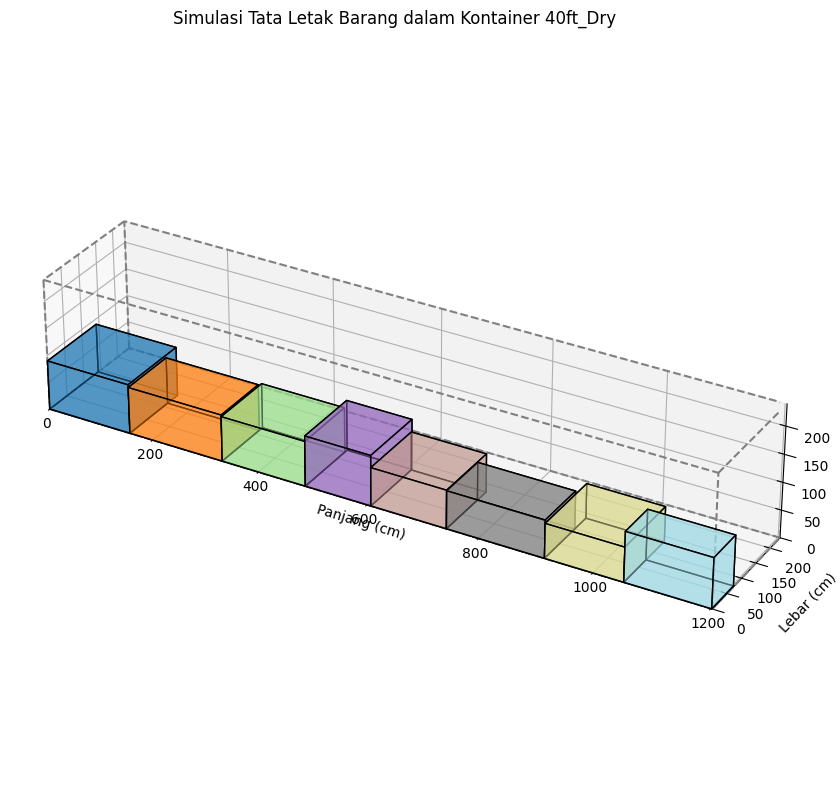


--- Rekomendasi Urutan Pemuatan (Berdasarkan Heuristik) ---
1. ID: MBL_013 - Dimensi: 156x142x90 cm, Berat: 11 kg, Posisi: (0,0,0)
2. ID: MBL_020 - Dimensi: 176x112x85 cm, Berat: 8 kg, Posisi: (156,0,0)
3. ID: MBL_003 - Dimensi: 155x122x82 cm, Berat: 31 kg, Posisi: (332,0,0)
4. ID: MBL_005 - Dimensi: 120x129x92 cm, Berat: 14 kg, Posisi: (487,0,0)
5. ID: MBL_009 - Dimensi: 136x127x70 cm, Berat: 48 kg, Posisi: (607,0,0)
6. ID: MBL_014 - Dimensi: 173x99x69 cm, Berat: 20 kg, Posisi: (743,0,0)
7. ID: MBL_016 - Dimensi: 137x136x63 cm, Berat: 24 kg, Posisi: (916,0,0)
8. ID: MBL_017 - Dimensi: 149x74x91 cm, Berat: 14 kg, Posisi: (1053,0,0)

--- Interpretasi dan Rekomendasi ---
Efisiensi pemanfaatan volume kontainer 40ft_Dry adalah 16.58%.
Faktor-faktor yang paling mempengaruhi efisiensi tata letak ini meliputi:
- **Bentuk dan Ukuran Barang:** Barang dengan bentuk tidak beraturan atau ukuran yang sangat beragam cenderung menyisakan lebih banyak ruang kosong.
- **Kapasitas Kontainer:** Pemiliha

In [10]:
# Mengimport mplot3d untuk visualisasi 3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

if optimized_items:
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Gambar kontainer sebagai kerangka
    cx, cy, cz = selected_container_spec['Panjang_Internal'], selected_container_spec['Lebar_Internal'], selected_container_spec['Tinggi_Internal']

    # Vertices dan faces untuk kubus kontainer
    # (0,0,0) (cx,0,0) (0,cy,0) (0,0,cz) (cx,cy,0) (cx,0,cz) (0,cy,cz) (cx,cy,cz)
    vertices = [
        [0, 0, 0], [cx, 0, 0], [cx, cy, 0], [0, cy, 0],
        [0, 0, cz], [cx, 0, cz], [cx, cy, cz], [0, cy, cz]
    ]
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]], # Bottom
        [vertices[4], vertices[5], vertices[6], vertices[7]], # Top
        [vertices[0], vertices[1], vertices[5], vertices[4]], # Front
        [vertices[2], vertices[3], vertices[7], vertices[6]], # Back
        [vertices[1], vertices[2], vertices[6], vertices[5]], # Right
        [vertices[0], vertices[3], vertices[7], vertices[4]]  # Left
    ]

    # Untuk kerangka, kita bisa hanya menggambar garis
    edges = [
        [0,1],[1,2],[2,3],[3,0], # Bottom
        [4,5],[5,6],[6,7],[7,4], # Top
        [0,4],[1,5],[2,6],[3,7]  # Sides
    ]

    for edge in edges:
        ax.plot3D(*zip(*[vertices[i] for i in edge]), color="gray", linestyle='--')


    # Gambar setiap item yang dimuat
    colors = plt.cm.get_cmap('tab20', len(optimized_items)) # Warna berbeda untuk setiap item
    for i, item in enumerate(optimized_items):
        x, y, z = item['Pos_X'], item['Pos_Y'], item['Pos_Z']
        dx, dy, dz = item['Panjang'], item['Lebar'], item['Tinggi']

        # Vertices untuk kubus item
        item_vertices = [
            [x, y, z], [x+dx, y, z], [x+dx, y+dy, z], [x, y+dy, z],
            [x, y, z+dz], [x+dx, y, z+dz], [x+dx, y+dy, z+dz], [x, y+dy, z+dz]
        ]

        # Faces untuk kubus item
        item_faces = [
            [item_vertices[0], item_vertices[1], item_vertices[2], item_vertices[3]], # Bottom
            [item_vertices[4], item_vertices[5], item_vertices[6], item_vertices[7]], # Top
            [item_vertices[0], item_vertices[1], item_vertices[5], item_vertices[4]], # Front
            [item_vertices[2], item_vertices[3], item_vertices[7], item_vertices[6]], # Back
            [item_vertices[1], item_vertices[2], item_vertices[6], item_vertices[5]], # Right
            [item_vertices[0], item_vertices[3], item_vertices[7], item_vertices[4]]  # Left
        ]

        # Tambahkan patch kubus untuk item
        ax.add_collection3d(Poly3DCollection(item_faces, facecolors=colors(i), linewidths=1, edgecolors='k', alpha=.5))

        # Tambahkan label ID barang (opsional, bisa sangat ramai)
        # ax.text(x + dx/2, y + dy/2, z + dz/2, item['ID_Barang'], color='black', ha='center', va='center', fontsize=8)


    ax.set_xlabel('Panjang (cm)')
    ax.set_ylabel('Lebar (cm)')
    ax.set_zlabel('Tinggi (cm)')
    ax.set_title(f'Simulasi Tata Letak Barang dalam Kontainer {target_container_type}')

    # Atur batas sumbu agar sesuai dengan kontainer
    ax.set_xlim([0, cx])
    ax.set_ylim([0, cy])
    ax.set_zlim([0, cz])

    # Atur rasio aspek agar terlihat seperti kubus
    ax.set_box_aspect([cx, cy, cz]) # Requires matplotlib >= 3.3
    # Untuk versi lebih lama:
    # max_dim = max(cx, cy, cz)
    # ax.set_aspect('auto') # atau 'equal' jika dimensinya mirip

    plt.show()
else:
    print("\nTidak ada item yang dimuat untuk divisualisasikan.")

# Rekomendasi Urutan Pemuatan
print("\n--- Rekomendasi Urutan Pemuatan (Berdasarkan Heuristik) ---")
if optimized_items:
    for i, item in enumerate(optimized_items):
        print(f"{i+1}. ID: {item['ID_Barang']} - Dimensi: {item['Panjang']}x{item['Lebar']}x{item['Tinggi']} cm, Berat: {item['Berat']} kg, Posisi: ({item['Pos_X']},{item['Pos_Y']},{item['Pos_Z']})")
else:
    print("Tidak ada barang yang dimuat.")

# Interpretasi Faktor
print("\n--- Interpretasi dan Rekomendasi ---")
print(f"Efisiensi pemanfaatan volume kontainer {target_container_type} adalah {efficiency:.2f}%.")
print("Faktor-faktor yang paling mempengaruhi efisiensi tata letak ini meliputi:")
print("- **Bentuk dan Ukuran Barang:** Barang dengan bentuk tidak beraturan atau ukuran yang sangat beragam cenderung menyisakan lebih banyak ruang kosong.")
print("- **Kapasitas Kontainer:** Pemilihan jenis kontainer yang sesuai dengan volume dan berat total barang sangatlah vital.")
print("- **Algoritma Penempatan:** Heuristik sederhana seperti FFDV mungkin tidak menemukan konfigurasi paling optimal. Pertimbangkan untuk: ")
print("  - Mengimplementasikan **rotasi** barang untuk menemukan orientasi terbaik.")
print("  - Menggunakan algoritma yang lebih kompleks yang mencari dan mengisi **ruang kosong (voids)** dalam kontainer.")
print("  - Menerapkan **batasan tambahan** seperti 'fragile' (tidak boleh ditumpuk), 'tidak boleh terbalik', atau batasan berat/stabilitas per area.")
print("  - Eksplorasi **metaheuristik** (contoh: Genetic Algorithm, Simulated Annealing) untuk menemukan solusi yang mendekati optimal.")
print("- **Berat Barang:** Selalu perhatikan batasan berat maksimum kontainer, karena ini seringkali menjadi batasan yang lebih ketat daripada volume.")